# Introduction to K-means

### By the end of this lecture, students will be able to:

- **Assess** what scenarios could use k-means

- **Articulate** the methodology used by k-means

- **Apply** KMeans from sklearn.cluster to a relevant dataset

- **Select** the appropriate number of clusters using k-means and the elbow method

- **Evaluate** the weaknesses and remedies to k-means

## Scenario

>You work for the marketing department within a large company that manages a customer base. 
For each customer you have a record of average purchase cost and time since last purchase.<br> 
You know that if you want to retain your customers you cannot treat them the same. You can use targeted marketing ads towards groups that demonstrate different behavior, but how will you divide the customers into groups?

## **Part 1**: Concept introduction
#### Import libraries and download dataset

We are continuing to use Scikit Learn as our main library.
The specific documentation for k-means can be found [here](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

In [3]:
# Required packages for today
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import datasets

# Familiar packages for plotting, data manipulation, and numeric functions
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# import Alison's code for the demo clusters
from demo_images import *

# Have plots appear in notebook
%matplotlib inline

# Default plot params
plt.style.use('seaborn')
cmap = 'tab10'

## Clustering!   Finding **GROUPS**

How many groups do you see?

![img](img/initialscenario.png)


## Wait - How is clustering different from classification?

>In _classification_ you **know** what groups are in the dataset and the goal is to _**predict**_ class membership accurately.

>In _clustering_ you **do not** know which groups are in the dataset and you are trying to _**identify**_ the groups.

### So what do you do with clustering results?

Clustering is often an *informing* step in your analysis. Once clusters are identified, one can:
- Create strategies on how to approach each group differently
- Use cluster membership as an independent variable in a predictive model
- Use the clusters as the _**target label**_ in future classification models. How would you assign new data to the existing clusters?

## Explore the algorithm with an intuitive K means approach

### Observe the following four methods with a sample dataset:

### Method Questions:

- What do they have in common?
- What are the differences between them?
- How many groups are there in the end?
- Do you see any problems with this method?

#### Method 1

![left](img/from-left.gif)

#### Method 2

![right](img/from-right.gif)

#### Method 3

![top](img/from-top.gif)

#### Method 4

![bottom](img/from-bottom.gif)

### Review Method Questions:

- What do they have in common?
- What are the differences between them?
- How many groups are there in the end?
- Do you see any problems with this method?

In common:
- Green dots starts at points
- Calculates distance
- Moves dots
- Re-measures distance
- Moves dots as needed


Differences:
- Dots start in different places and groups settle in different places

Groups:
- There are four groups

Problem with this method?
- Too variable!

### K-means algorithm, at its core, in an optimization function

![minmax](img/minmaxdata.png)

### Reassigns groups and adjusts centroids to...
![min](img/min.png)

### And to...
![max](img/max.png)

**Sci-kit Learn** documentation actually has some pretty good [documentation describing the algorithm](https://scikit-learn.org/stable/modules/clustering.html#k-mean) if you wish for more detail.

#### Data for the exercise

- This is a sample dataset. 
- Let us assume the data is already scaled.

In [51]:
dummy_dat = pd.read_csv("xclara.txt",header=0,index_col=0)

In [10]:
dummy_dat.head()

In [11]:
dummy_dat.tail()

#### EDA of variables

In [12]:
dummy_dat.describe()

In [13]:
plt.scatter(dummy_dat['V1'], dummy_dat['V2'])
plt.scatter(model.cluster_centers_[0][0], model.cluster_centers_[0][1])
plt.scatter(model.cluster_centers_[1][0], model.cluster_centers_[1][1]),
plt.scatter(model.cluster_centers_[2][0], model.cluster_centers_[2][1]);

#### Introduction of `Kmeans`

In [81]:
dummy_dat = dummy_dat.drop('index', axis=1)

In [89]:
model = KMeans(n_clusters=5).fit(dummy_dat)

In [15]:
model.cluster_centers_

In [16]:
model.inertia_

In [17]:
model.predict([[40, 30]])

In [68]:
# dummy_dat.reset_index(inplace=True)
# dummy_dat

In [18]:
plt.scatter(dummy_dat['V1'], dummy_dat['V2'], c=model.labels_);

In [69]:
labeled_df = pd.concat([dummy_dat, pd.DataFrame(model.labels_,
                        columns=['cluster'])], axis=1)

In [70]:
cluster0 = labeled_df[labeled_df['cluster'] == 0]
cluster1 = labeled_df[labeled_df['cluster'] == 1]
cluster2 = labeled_df[labeled_df['cluster'] == 2]

In [19]:
type(cluster0['V2'][0])

In [20]:
cluster0['V1'].head()

In [21]:
plt.scatter(cluster0['V1'], cluster0['V2'], c='k')
plt.scatter(cluster1['V1'], cluster1['V2'], c='c')
plt.scatter(cluster2['V1'], cluster2['V2'], c='r');

## Note! 
#### Do you have different cluster_centers?
*Good!*

We saw in the demo that the algorithm is sensitive to starting points.

We can use the additional argument `random_state` to set the seed and have repeatable results

In [22]:
model_setseed = KMeans(n_clusters=4, random_state=10).fit(dummy_dat)
model_setseed.cluster_centers_

#### **Exercise**: 
- Try running `Kmeans` with different number of `n_clusters`, k=2 through k=7
- Check the `cluster_centers_` 
- Without running any more functions, which number of K is the best?

In [23]:
#Practice code goes here

model2 = KMeans(n_clusters=2, random_state=42)
model2.fit(dummy_dat)
model2.cluster_centers_

## **Part 2**: Choosing the appropriate number of K

#### Two metrics we can use: **elbow method** and the **silhouette coefficient**

### **Part 2A**: Elbow Method

Elbow method uses the sum of squared error calculated from each instance of `k` to find the best value of `k`.

This is sometimes called the "inertia" of the model, and fitted sklearn k-means models have an `inertia_` attribute.

Sometimes you will see the SSE divided by the total sum of squares in the dataset (how far is each point from the center of the entire dataset)

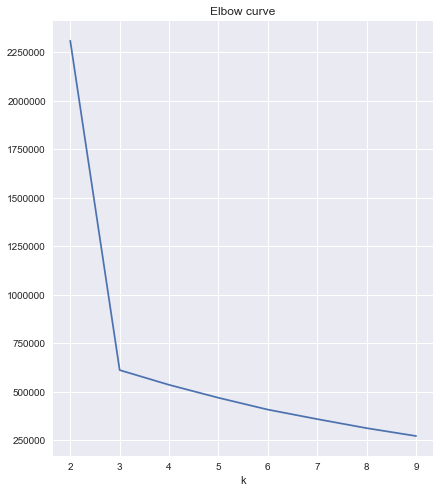

In [57]:
# Specifying the dataset and initializing variables
X = dummy_dat
distortions = []

# Calculate SSE for different K
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state = 301)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

# Plot values of SSE
plt.figure(figsize=(15,8))
plt.subplot(121, title='Elbow curve')
plt.xlabel('k')
plt.plot(range(2, 10), distortions)
plt.grid(True)


### **Part 2B**: Silhouette coefficient

![silo](img/silo2.png)

> **a** refers to the average distance between a point and all other points in that cluster.

> **b** refers to the average distance between that same point and all other points in clusters to which it does not belong

It is calculated for each point in the dataset, then averaged across all points for one cumulative score.

Silhouette coefficient ranges between -1 and 1. The closer to 1, the more clearly defined are the clusters. The closer to -1, the more incorrect assignment.





In [58]:
# Generate silhouette coefficient for each k
X = dummy_dat
silhouette_plot = []
for k in range(2, 10):
    clusters = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusters.fit_predict(X)
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    silhouette_plot.append(silhouette_avg)

In [24]:
# Plot Silhouette coefficient
plt.figure(figsize=(15,8))
plt.subplot(121, title='Silhouette coefficients over k')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.plot(range(2, 10), silhouette_plot)
plt.axhline(y=np.mean(silhouette_plot), color="red", linestyle="--")
plt.grid(True)

## **Part 3**: **Assumptions** and **challenges** of K-means

- Demonstrate the ideal K-means dataset
- Show three scenarios where K-means struggles

#### Ideal K-means scenario

In [25]:
ideal()

#### Meets all assumptions:

- Independent variables
- Balanced cluster sizes
- Clusters have similar density
- Spherical clusters/equal variance of variables


#### Problem Scenario 1 - classes not all round

In [27]:
messyOne()

#### Problem Scenario 2 - imbalanced class size

In [28]:
messyTwo()

#### Problem Scenario 3 - class size and density

In [29]:
messyThree()

#### Solution to challenges:

- Preprocessing: PCA or scaling
- Try a different clustering methods

## K-Means Plotter

In [1]:
import k_means_plotter
from sklearn.datasets import make_blobs

In [6]:
X, Y =  make_blobs(centers=3)

In [31]:
plt.scatter(X[:, 0], X[:, 1]);

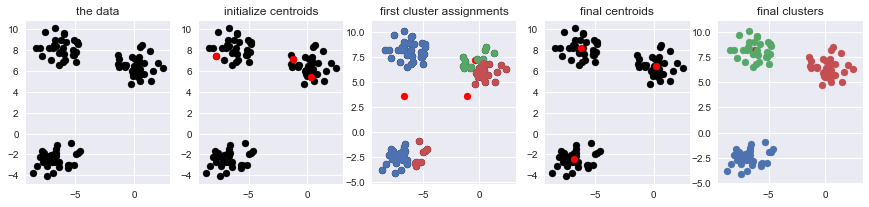

In [9]:
df = k_means_plotter.k_means(X[:, 0], X[:, 1], k=3)

## Exercise:
### K-means on larger dataset - Wine subscription

You want to run a wine subscription service, but you have no idea about wine tasting notes. You are a person of science.
You have a wine dataset of scientific measurements.
If you know a customer likes a certain wine in the dataset, can you recommend other wines to the customer in the same cluster?

#### Questions:
- How many clusters are in the wine dataset?
- What are the characteristics of each clusters?
- What problems do you see potentially in the data?

the dataset is `Wine.csv`

Instructions:
- First, remove customer_segment from the dataset

In [32]:
# Work on problem here:
wine = pd.read_csv('Wine.csv')
wine.drop(columns=['Customer_Segment'], inplace=True)
wine.head()

In [33]:
wine.columns

### Review k-means steps
1. Look at and clean data (if needed)
2. Scale data
3. Try various values of k
4. Plot SSE and Silohuette coefficient to find best `k`
5. Describe the characteristics of each cluster using their centroids

### How many clusters fit the data?

What can you tell me about them?

## One last example

Using online retail data data from [UCI database](https://archive.ics.uci.edu/ml/datasets/online+retail).

You are looking for patterns so you can get people to buy more, more frequently. 
You might have to create some new variables.

In [19]:
shopping = pd.read_excel('Online Retail.xlsx')

In [35]:
shopping.head()